# Importing Libraries



In [171]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Loading the Dataset

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Basic Data Info


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Exploratory Data Analysis

## Data Cleaning

In [5]:
# Loan ID is of no use so we will drop the column
df.drop("Loan_ID", axis=1, inplace=True) 

### Understanding null values in the dataset

<AxesSubplot:>

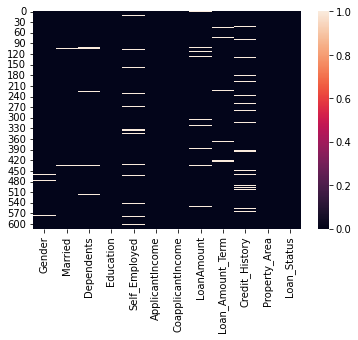

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Info about Education Column

<AxesSubplot:ylabel='Education'>

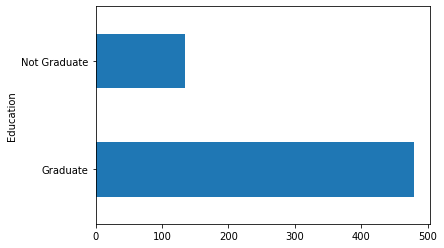

In [8]:
df.groupby("Education")["Education"].count().plot(kind="barh")

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

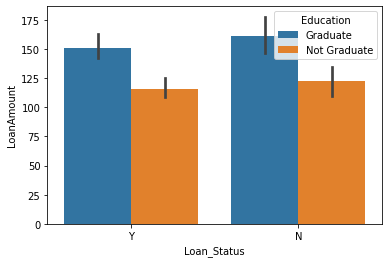

In [9]:
sns.barplot(df["Loan_Status"], df["LoanAmount"], hue=df["Education"])

In [10]:
# There is no significant difference in the data of Education Column so it is better to drop it.
df.drop("Education", axis=1, inplace=True)


### Info about Self Employed Column

In [11]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

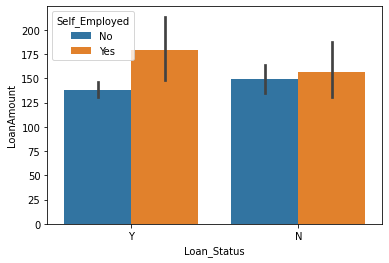

In [12]:
sns.barplot(df["Loan_Status"], df["LoanAmount"], hue=df["Self_Employed"])

In [20]:
# Function to impute values into null values of Self Employed column.
def impute_self_emp(cols):
    self_emp = cols[0]
    loan_stat = cols[1]
    
    if pd.isnull(self_emp):
        if loan_stat == "Y":
            return "Yes"
        else:
            return "No"

    else:
        return self_emp
df["Self_Employed"] = df[["Self_Employed", "Loan_Status"]].apply(impute_self_emp, axis=1)
df["Self_Employed"] = pd.get_dummies(df["Self_Employed"], drop_first=True)
df["Self_Employed"] = df["Self_Employed"].apply(int)

<AxesSubplot:>

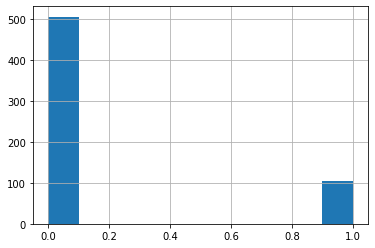

In [92]:
df["Self_Employed"].hist()

### Info about Credit History column.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

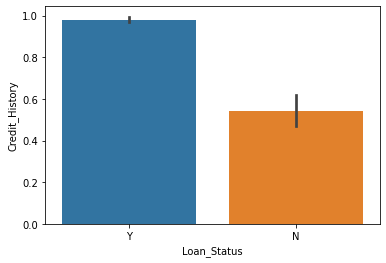

In [22]:
sns.barplot(x=df["Loan_Status"], y=df["Credit_History"])

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

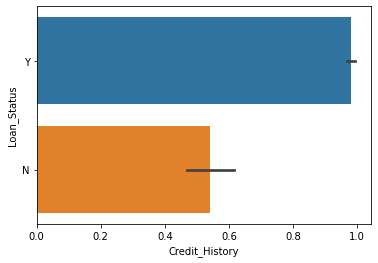

In [23]:
sns.barplot(df["Credit_History"], df["Loan_Status"])

In [24]:
# Function to impute values into null values of Credit History column.
def impute_cred(cols):
    cred_hist = cols[0]
    loan_stat = cols[1]
    if pd.isnull(cred_hist):
        if loan_stat == "Y":
            return 1.0
        else:
            return 0.0
    else:
        return cred_hist
df["Credit_History"] = df[["Credit_History", "Loan_Status"]].apply(impute_cred, axis=1)

<AxesSubplot:>

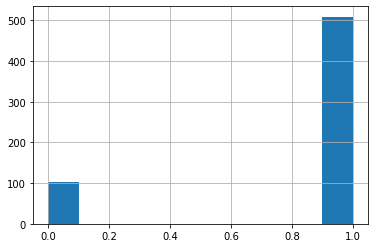

In [94]:
df["Credit_History"].hist()

### Getting numerical values(dummy variable) for the Target column.

In [25]:
df["loan_approved"] = pd.get_dummies(df["Loan_Status"], drop_first=True)
df.drop("Loan_Status", axis=1, inplace=True)

### Filling null values of Co applicant income column.

In [26]:
df["CoapplicantIncome"].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [27]:
df.drop("CoapplicantIncome", axis=1, inplace=True)

### Info about Property Area

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

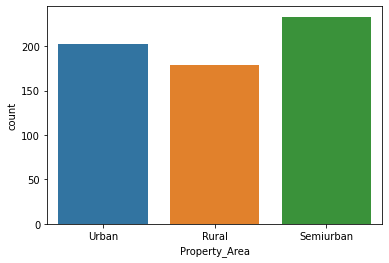

In [28]:
sns.countplot(df["Property_Area"])

In [29]:
def prop_label_converter(x):
    if x == "Urban":
        return 0
    elif x == "Rural":
        return 1
    else:
        return 2
df["Property_Area"] = df["Property_Area"].apply(prop_label_converter)
        

### Filling null values of Gender

In [30]:
df["Gender"].value_counts() / df.shape[0]

Male      0.796417
Female    0.182410
Name: Gender, dtype: float64

In [42]:
#  We fill the missing values with Male because approx 80% of the data is Male.
df["Gender"] = df["Gender"].fillna("Male")
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)
df["Gender"]  =df["Gender"].apply(int)

### Filling the null values of Loan Amount with Average Loan Amount

In [32]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

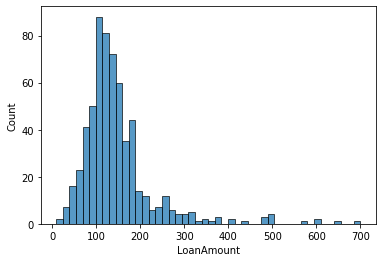

In [96]:
sns.histplot(df["LoanAmount"])

### Fixing the Dependents Column

In [34]:
df["Dependents"].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [35]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
# Filling null values and changing the datatype of the column
def imputer_dep(x):
    if x == "3+":
        return "3"
    if pd.isnull(x):
        return "0"
    else:
        return x

df["Dependents"] = df["Dependents"].apply(imputer_dep)
df["Dependents"] = df["Dependents"].apply(int)

### Filling the null values of the Loan Amount Term column with it's average

In [37]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

### The following null values are present in married column, i.e 3 values, so we will drop it

In [44]:
df.dropna(inplace=True)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)

### Now, we see that our data is entirely clean, now we can proceed to fitting our model.

In [40]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
loan_approved       0
dtype: int64

In [98]:
df

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_approved
0,1,0,0,0,5849,146.412162,360.0,1.0,0,1
1,1,1,1,0,4583,128.000000,360.0,1.0,1,0
2,1,1,0,1,3000,66.000000,360.0,1.0,0,1
3,1,1,0,0,2583,120.000000,360.0,1.0,0,1
4,1,0,0,0,6000,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,71.000000,360.0,1.0,1,1
610,1,1,3,0,4106,40.000000,180.0,1.0,1,1
611,1,1,1,0,8072,253.000000,360.0,1.0,0,1
612,1,1,2,0,7583,187.000000,360.0,1.0,0,1


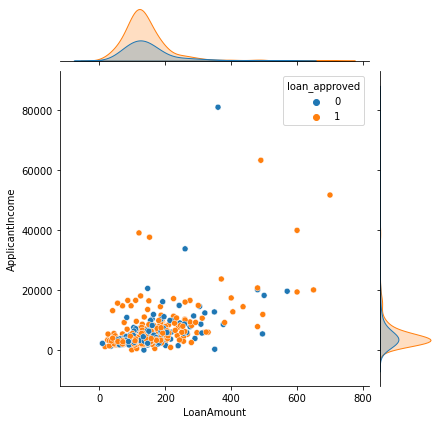

In [101]:
sns.jointplot(df["LoanAmount"], df["ApplicantIncome"], hue=df["loan_approved"])

In [121]:
df['LoanAmount'].median()

128.0

In [136]:
df["Loan_Amount_Term"].mean()

341.911620294599

In [138]:

df[(df["LoanAmount"] > 128) & (df["Loan_Amount_Term"] > 180)].count()["loan_approved"]

280

<AxesSubplot:xlabel='Dependents', ylabel='loan_approved'>

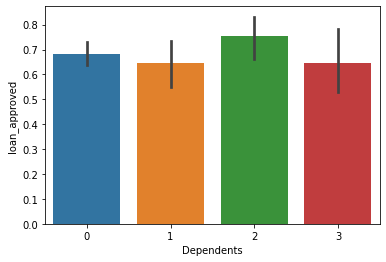

In [141]:
sns.barplot(df["Dependents"], df["loan_approved"])

<AxesSubplot:>

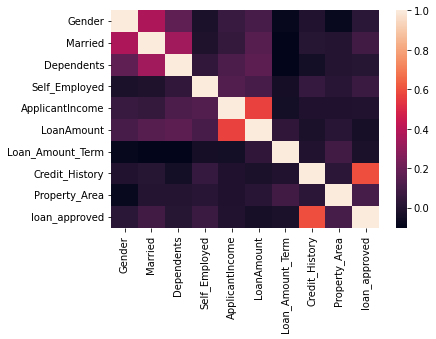

In [184]:
sns.heatmap(df.corr())

In [149]:
df[(df['Dependents'] == 3) & (df['loan_approved'])].count() / df[(df['Dependents'] == 3)].count() * 100

Gender              64.705882
Married             64.705882
Dependents          64.705882
Self_Employed       64.705882
ApplicantIncome     64.705882
LoanAmount          64.705882
Loan_Amount_Term    64.705882
Credit_History      64.705882
Property_Area       64.705882
loan_approved       64.705882
dtype: float64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

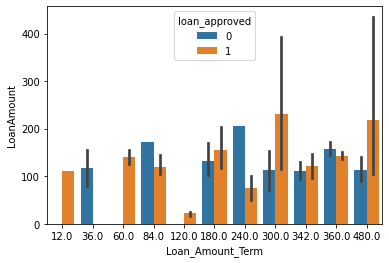

In [153]:
sns.barplot(df["Loan_Amount_Term"], df["LoanAmount"], hue=df["loan_approved"])

In [167]:
df[(df["Gender"] == 1) & (df["loan_approved"] == 1)]["loan_approved"].count() / df[(df["Gender"] == 1)].count()["loan_approved"] * 100

69.0

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

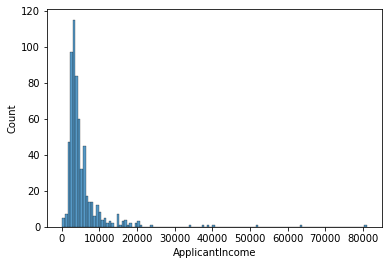

In [170]:
sns.histplot(df["ApplicantIncome"])

# Machine Learning Model

In [78]:
# Assigning x and y values then splitting it into training and testing set.
X = df.drop("loan_approved", axis=1)
y = df["loan_approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Random Forest

In [79]:
# Creating and fitting the model.
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [80]:

prediction = model.predict(X_test)
print(classification_report(y_test, prediction))



              precision    recall  f1-score   support

           0       0.85      0.62      0.72        37
           1       0.85      0.95      0.90        86

    accuracy                           0.85       123
   macro avg       0.85      0.79      0.81       123
weighted avg       0.85      0.85      0.85       123



### Logistic Regression

In [86]:
model = LogisticRegression()
model.fit(X_train,y_train)
preds2= model.predict(X_test)
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65        37
           1       0.82      1.00      0.90        86

    accuracy                           0.85       123
   macro avg       0.91      0.74      0.78       123
weighted avg       0.87      0.85      0.83       123



In [91]:
param = {"penalty": ["l1", "l2", "elasticnet", 'none'], "C": [0.1, 1, 10, 100],
             "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
            "multi_class": ["auto", "ovr", "multinomial"]}
grid = GridSearchCV(LogisticRegression(), new_param, verbose=1)

In [88]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [89]:
grid.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [172]:
preds = grid2.predict(X_test)
print(confusion_matrix(y_test, preds2), classification_report(y_test, preds2))

[[18 19]
 [ 0 86]]               precision    recall  f1-score   support

           0       1.00      0.49      0.65        37
           1       0.82      1.00      0.90        86

    accuracy                           0.85       123
   macro avg       0.91      0.74      0.78       123
weighted avg       0.87      0.85      0.83       123



# Our Logistic Regression Model was able to predict with 85% Accuracy

## Insights: 
  

####  1. Self Employed People are more likely to be approved of loan. Possibly because of less chances of losing a job.

#### 2. The people having a Credit History have a higher chance of being approved for a loan.

#### 3. Most of high amount loans also have a higher loan term.

#### 4. Dependents is a very good criteria in approving a loan. There is 64 %chance a loan will be approved if the applicant has 3 or more than      3 dependents.


#### 5.High term loans are more likely to be approved.